In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [185]:
data = pd.read_csv("insurance.csv")

## Data Analysis

In [186]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

** column names are valid

In [187]:
data.shape

(1338, 7)

** has 1338 rows and 7 columns

In [188]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age - age of person                          
sex - male or female - categorical                    
bmi - body mass index                            
childern - number of children  
smoker - yes or no -- categorical        
region - southwest, southeast, northwest, northeast    - categorical
charges - insurance cost - target variable                

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- data contain both categorical and numerical data
- columns has no missing values - no need to clean

In [190]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- age: mean ~39, range 18–64
- bmi: mean ~30.66, range 16–53
- children: mean ~1.09, range 0–5
- charges: mean ~13270, range 1121–63770

In [191]:
data.duplicated().sum()

np.int64(1)

** 1 record is duplicate - need to be clean

## Data Visualization

### 1. Histogram and boxplot for each numeric column

In [192]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
for col in numeric_cols:
    fig = px.histogram(
        data, 
        x=col, 
        nbins=20, 
        marginal="box",
        title=f"Histogram of {col} with Boxplot",
        width=600,   
        height=350   
    )
    fig.show()


- Histogram shows freq. distribution
- boxplot shows median, outliers
1. age : mostly range 20-50 years, outliers are rare
2. bmi : slightly right-skewed, few high-bmi outliers
3. childern : mostly 0-2 childern, few 3-5
4. charges : highly right-skewed, has outliers 

### 2. Scatter Plot - age vs charges

In [193]:
fig = px.scatter(data, x='age', y='charges', color='smoker',
                 size='bmi',
                 title="Age vs Charges by Smoker Status",
                 width=900, height=450)
fig.show()

- X-axis → Age,    Y-axis → Charges
- Point color → Smoker (yes/no)
- Point size → BMI

1. smokers have higher charges, non-smokers lower charges (blue, red)
2. older people pay slightly more, but smoker status dominates
3. high bmi individuals also increases sizes (point size)

### 3. Boxplot - charges vs smokers

In [194]:
fig = px.box(data, x='smoker', y='charges', color='smoker',
             title="Charges Distribution by Smoker Status",
             width=600, height=350)
fig.show()

1. Median charges for smokers are much higher than non-smokers
2. Smokers have many extreme high outliers
3. Non-smokers mostly clustered at lower charges

### 4. Bar Plot - no. of people count vs region

In [195]:
fig = px.histogram(data, x='region', color='region',
                   title="Number of People by Region",
                   width=600, height=350)
fig.show()

1. southwest region has highest number of people
2. others are relatively balanced

### 5. Heatmap : correlation

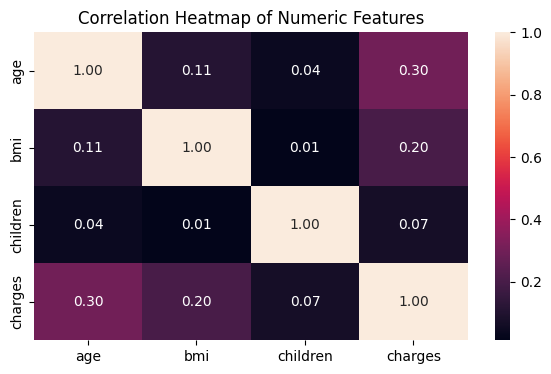

In [196]:
corr = data[numeric_cols].corr()

plt.figure(figsize=(7, 4))
sns.heatmap(
    corr,                # correlation matrix
    annot=True,          # show numbers in cells
    fmt=".2f",           # float format with 2 decimals
)


plt.title("Correlation Heatmap of Numeric Features")
plt.show()

- charges vs age = 0.30 --> weak positive correlation
- charges vs bmi = 0.20 --> very weak positive correlation
- charges vs children = 0.07 --> almost no correlation
- charges is slightly influenced by age and bmi, but not by children

### Final conclusion
- Smoker status → strongest predictor of charges.
- Age → moderate effect on charges.
- BMI → slight effect.
- Children & Region → minor effect.
- Charges are skewed with high outliers, mostly smokers.
- Preprocessing (encoding, cleaning, removing duplicates) will be required for regression.

## Data Preprocessing

In [197]:
data = data.drop_duplicates()

In [198]:
data.duplicated().sum()

np.int64(0)

In [199]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

** nulls and duplicates are remove

### Encoding

In [200]:
data[['sex', 'smoker', 'region']].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [201]:
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [202]:
data[['sex', 'smoker', 'region']].head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


- sex → female = 0, male = 1
- smoker → no = 0, yes = 1
- region → northeast = 0, northwest = 1, southeast = 2, southwest = 3

## Multi-linear Regression

#### Split input features and target variable

In [203]:
x = data.drop('charges', axis=1)
y = data['charges']

In [204]:
print(x.shape) 
print(y.shape)

(1337, 6)
(1337,)


In [205]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [206]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Train-Test split

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [208]:
print(x_train.shape)     # 80%  
print(x_test.shape)  

(1069, 6)
(268, 6)


In [209]:
print(y_train.shape)     # 80%  
print(y_test.shape)  

(1069,)
(268,)


** Data is ready for Multi Linear Regression

In [210]:
model = LinearRegression()

model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


** model learned linear replcationship bet input features and charges

In [211]:
y_pred = model.predict(x_test)

** trained model predicts insurance charges for unseen test data

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.8068466322629111
Mean Squared Error: 35493102.61165053


- r2 score - 0.807 --> model has strong predictive performance
- mse - relatively high beacuse charges are large in magnitude

In [ ]:
compare_df = pd.DataFrame({
    'Actual Charges': y_test,
    'Predicted Charges': y_pred
})

compare_df.head()

,Actual Charges,Predicted Charges
900,8688.85885,8080.450186
1064,5708.86700,5592.871120
1256,11436.73815,14378.298655
298,38746.35510,31731.819541
237,4463.20510,9158.356944


In [217]:
fig = px.scatter(compare_df, x='Actual Charges', y='Predicted Charges',
                 title="Actual vs Predicted Insurance Charges",
                 width=600, height=450)
fig.show()


Points lie close to the diagonal, indicating that the model’s predicted insurance charges closely match the actual values, with some deviation for higher charges